In [1]:
from colradlumo_library import * 
import matplotlib.pyplot as plt

In [2]:
f = np.loadtxt('measured_spec/AT2017gfo_ENGRAVE_v1.0_XSHOOTER_MJD-57990.000_Phase+7.40d_deredz.dat')
parsec_cm = 3.086e+18

d_Mpc = 40 
d_cm = d_Mpc * 1e6 * parsec_cm
d_cm_squared = d_cm*d_cm

wl_ang = f[:,0]
wl_mic = f[:,0]*1e-4

flux = f[:,1]
lumo_ergs_s_ang = flux *4*np.pi*d_cm_squared


In [3]:
def my_gauss(param,wl):
    a,b,c,d = param 

    ex = (wl - b) / c
    gaus = a * np.exp(-0.5 * np.power(ex,2)) + d
    return gaus

In [4]:
def chisq(param,obs,wl):
    #print(a,b,c)

    gaus = 1e35*my_gauss(param,wl)
    return np.sum(np.power(gaus-obs,2))

Text(0, 0.5, 'Luminosity ergs/s/ang')

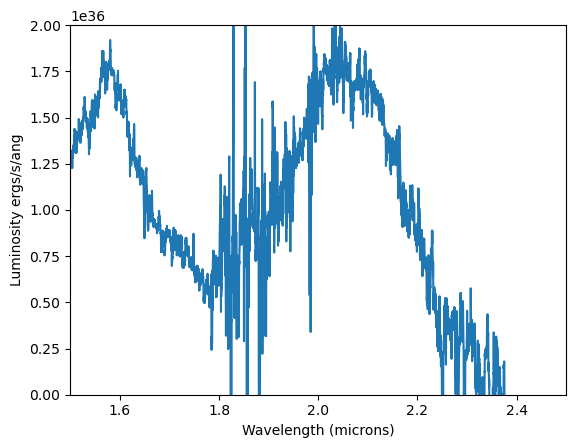

In [5]:
plt.xlim([1.5,2.5])
plt.ylim([0e36,2e36])

continuum = 0.8e36

plt.plot(wl_mic,lumo_ergs_s_ang - 1.5e36 )
plt.xlabel('Wavelength (microns)')
plt.ylabel('Luminosity ergs/s/ang')

In [6]:
lower_bound = 1.9
upper_bound =  2.30
isolated_wl = wl_mic[(wl_mic > lower_bound) & (wl_mic < upper_bound) ] 
isolated_lumo = lumo_ergs_s_ang[(wl_mic > lower_bound) & (wl_mic < upper_bound) ]

In [ ]:
trap(isolated_wl*10_000,isolated_lumo)

In [8]:
p0 = [10,2.07,0.07,1]
chisq(p0,isolated_lumo,isolated_wl)

3.142588302413867e+76

In [9]:
from scipy.optimize import minimize

result = minimize(chisq,p0,args=(isolated_lumo,isolated_wl),bounds=([0,50],[1.5,2.5],[0,0.5],[0,100])) # perform the minimisat

Text(0, 0.5, 'Luminosity ergs/s/ang')

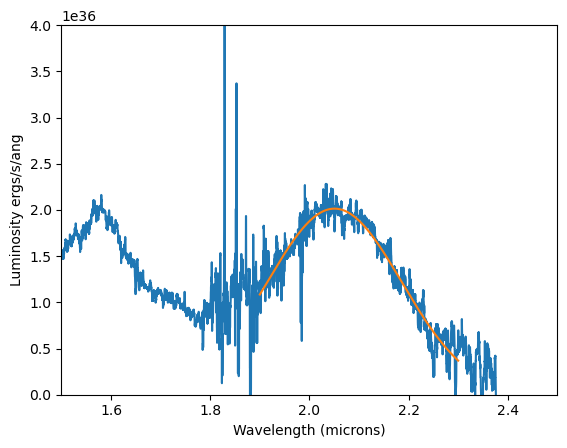

In [10]:
plt.xlim([1.5,2.5])
plt.ylim([0e36,4e36])

continuum = 0.8e36

plt.plot(wl_mic,lumo_ergs_s_ang -1e35*result.x[-1] )
plt.plot(isolated_wl,1e35*my_gauss(result.x,isolated_wl)-1e35*result.x[-1] )

plt.xlabel('Wavelength (microns)')
plt.ylabel('Luminosity ergs/s/ang')

In [11]:
def trap(wl,lumo):
    integral = 0
    for ii in range(0,len(wl)-1,1):
        integral += 0.5 * (wl[ii+1]-wl[ii]) * (lumo[ii]+lumo[ii+1])
    return integral
trap(isolated_wl*10000,1e35*my_gauss(result.x,isolated_wl)-1e35*result.x[-1])

5.700666903240901e+39

In [21]:
lower_bound = 0.90
upper_bound =  1.20
isolated_wl = wl_mic[(wl_mic > lower_bound) & (wl_mic < upper_bound) ] 
isolated_lumo = lumo_ergs_s_ang[(wl_mic > lower_bound) & (wl_mic < upper_bound) ]



In [22]:
from scipy.optimize import minimize
p0 = [10,1.08,0.07,1]

result = minimize(chisq,p0,args=(isolated_lumo,isolated_wl),bounds=([0,50],[0.9,1.1],[0,0.5],[0,100])) # perform the minimisat

In [23]:
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2.069389579660418e+74
        x: [ 1.273e+01  1.080e+00  6.703e-02  2.838e+01]
      nit: 31
      jac: [-2.511e+66  1.501e+69 -4.871e+68 -7.533e+66]
     nfev: 195
     njev: 39
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

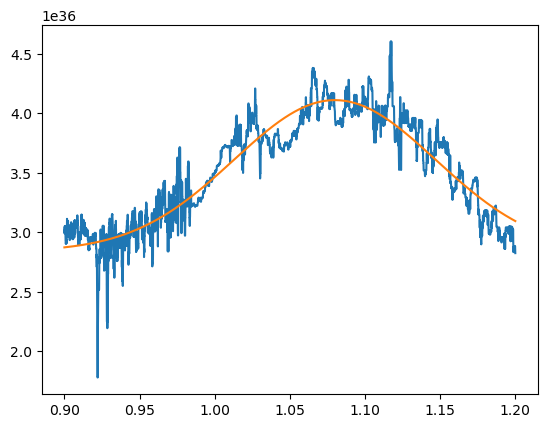

In [24]:
plt.plot(isolated_wl,isolated_lumo)
plt.plot(isolated_wl,1e35*my_gauss(result.x,isolated_wl))

In [26]:
trap(isolated_wl*10_000,1e35*my_gauss(result.x,isolated_wl)-1e35*result.x[-1])

2.0534796379179064e+39